
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Es un modelo de clasificación supervisado que predice la probabilidad de pertenencia a una clase.

Si deseamos clasificar algún tipo de imagen, resultado en campos médicos u astrofísicos, se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios básicos de regresión logística para aplicarla a los modelos de clasificación.

Supongamos que queremos clasificar dos tipos, basado en dos características:



In [22]:
import matplotlib.pyplot as plt

# Funciones para generar datos aleatorios para problemas de clasificación
from sklearn.datasets import make_classification, make_circles
import numpy as np

**Función** `make_classification`

* `n_samples` : Número de muestras a generar.

* `n_features` : Número total de características.

* `n_informative` : Número de características informativas.

* `n_redundant` : Número de características redundantes.

* `n_classes` : Número de clases (o etiquetas).

* `flip_y` : Fracción de etiquetas que se asignarán aleatoriamente.

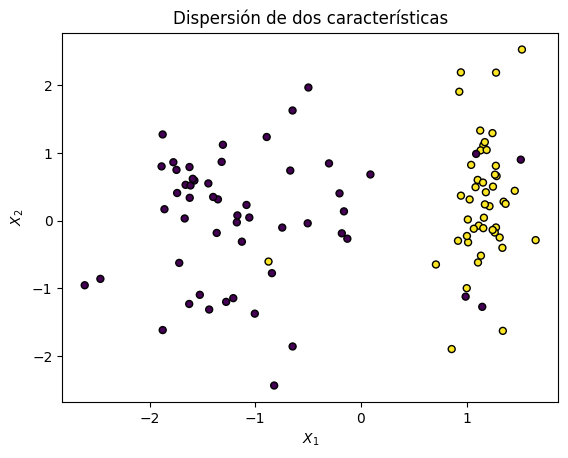

In [23]:
# Generamos un conjunto aleatorio de datos
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,
    random_state=1, class_sep=1.2, flip_y=0.15)

plt.figure()
plt.title('Dispersión de dos características')
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.show()

En problemas binarios, utiliza la función sigmoide para transformar una combinación lineal de las características en una probabilidad.

En este caso, cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de $y$ dado un $x$ parametrizado por $\theta$, $P(y|x;\theta)$, así:

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

> Si tenemos muestras equiprobables, podemos definir lo siguiente  para P :
>
> - $P<0.5$ se obtienen los objetos tipo 0
> - $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de los  sistemas basado en las probabilidades a partir de un **clasificador logístico**:


\begin{equation}
f(z) = \frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



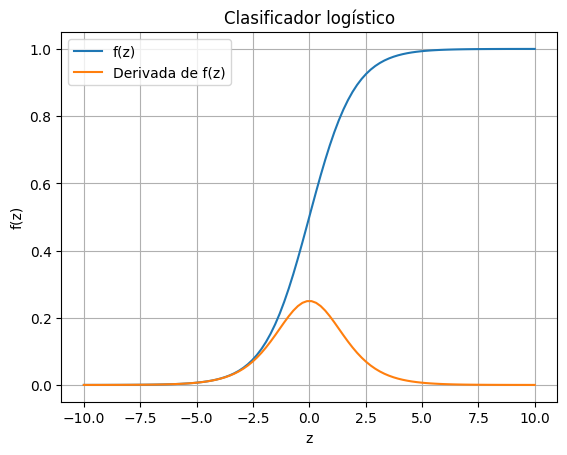

In [24]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.title('Clasificador logístico')
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()
plt.show()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$

- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cuál es la probabilidad de que dado un hiperplano, los valores de un hiperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logística a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, de modo que:

\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hiperplano  $\Theta^T X\geq 0.0$, $y = 1$

- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de decisión entre los datos a clasificar.

Para los datos dados arriba, se puede establecer el siguiente clasificador:

$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algún método encontramos los parámetros $\Theta$, entonces podemos definir la frontera de clasificación.

Como ejemplo, supongamos que encontramos los siguientes parámetros $\Theta=[3.0, -20, 1.0]$

Encontrar la ecuacion de la recta y mejorar la parametrización

$3-20x_1+x_2=0$

$x_2 = 20 x_1 - 3$

In [25]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3    # Frontera

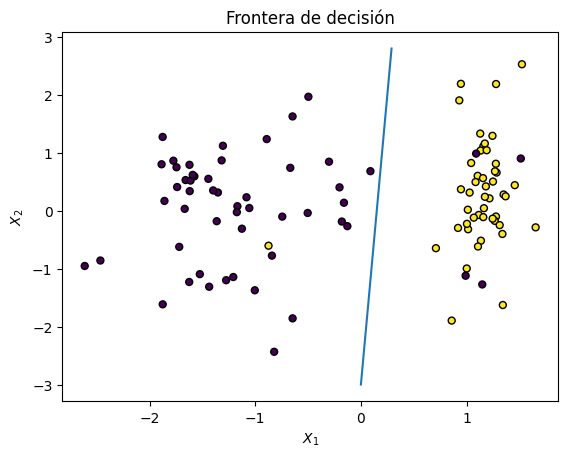

In [26]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)

plt.figure()
plt.title('Frontera de decisión')
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.show()

### Fronteras de decisión no lineales

**Fronteras no lineales** también pueden ser consideradas. Para ello se puede definir  $\Theta^T X$ como función de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de decisión en este caso está determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de $y=1$.

Para este mismo caso, supongamos que tenemos la siguiente distribución de datos, ¿Cuál es la mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes?:







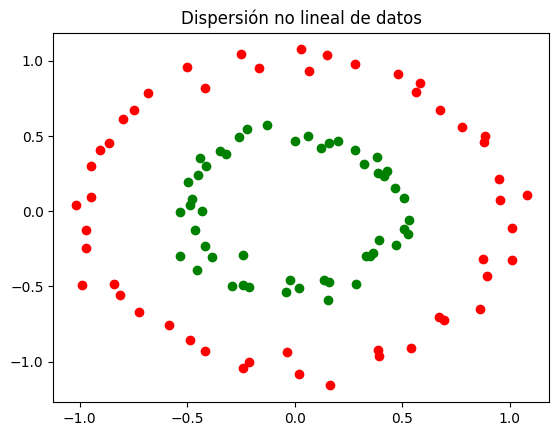

In [27]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)

red = y == 0
green = y == 1

f, ax = plt.subplots()
plt.title('Dispersión no lineal de datos')
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")
plt.show()

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en $(0, 0)$ y radio de $0.7$ aproxidamente, así, nuestra elección de parámetros para el polinomio ejemplicado es:

$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0 \quad ⟹ \quad \Theta^T = [0.7,0, 0, 1,1 ] $

Reemplazando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

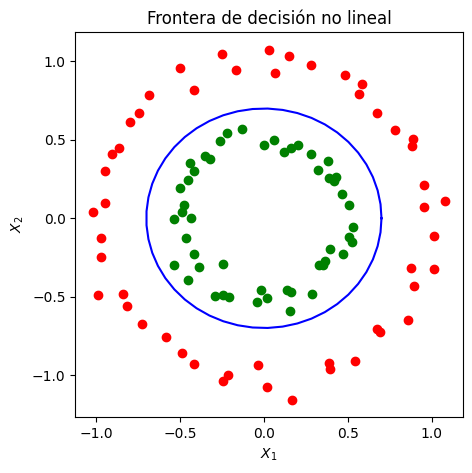

In [28]:
# Por motivos gráficos, convirtamos la ecuación anterior parametrizada por un ángulo alpha

alpha = np.linspace(0, 2*np.pi)
x1 = 0.7*np.cos(alpha)
x2 = 0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(5,5))
plt.title('Frontera de decisión no lineal')
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.show()

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



Para ello, podemos definir la función de coste como :


$$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] \quad (1)$$


Esta función de coste permite establecer el mejor clasificador para la regresión logística de acuerdo a la teoría de probabilidad.

* Se garantiza que cuando $P(y=1|x,\theta)$ se cumple que la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$.

* Análogamente, cuando $P(y=0|x,\theta)$ se cumple que la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.

**Nota:** La metrica empleada para la regresión lineal no es recomendada en este caso, dado que la funcion de coste puede presentar múltiples mínimos que dificultan la minimizacion a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoría de la probabilidad.

Se deja como tarea mostrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$

- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste, así nuestro algoritmo de minimización permite encontrar los valores de $\theta$ después de un conjunto determinado de iteraciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


**Nota:** Otros métodos de minimización podrían ser aplicados, tales como:


* [Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

* [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


* [L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

* [Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


## Regularización:

Se utiliza para prevenir el sobreajuste y mejorar la capacidad de generalización del modelo. Consiste en agregar un término de **penalización** al proceso de entrenamiento que controla la magnitud de los coeficientes del modelo.

**Tipos:**

1. **Ridge (L2)**: Define la función de coste de $(1)$ como:

$$J (\Theta) + \frac{\lambda}{2} \sum_{i=1}^m \theta_i^2$$

  donde $\lambda$ es un hiperparámetro que controla la fuerza de la penalización, y la sumatoria penaliza los coeficientes grandes.

  * Restringe los coeficientes al reducir su magnitud.

  * Útil para problemas donde hay muchas características correlacionadas.

\
2. **Lasso (L1)**: Penaliza el valor absoluto $|\theta_i|$, definiendo la función de coste de $(1)$ como:

$$J (\Theta) + \lambda \sum_{i=1}^m |\theta_i|$$

  * Favorece que algunos coeficientes se reduzcan exactamente a 0, realizando automáticamente selección de características.

  * Es útil cuando se trabaja con muchas características y se sospecha que muchas de ellas no son relevantes.

\
3. **ElasticNet**: Combina las dos anteriores a través de los coeficientes $\lambda_1$ que controla la penalización $L1$ y $\lambda_2$ que controla la penalización $L2$.

  * Útil cuando se necesita un balance entre reducción de coeficientes (L2) y selección de características (L1).

# Interpretación estadística


¿Qué tan adecuado es la elección de $J(\theta)$ para el modelo de regresión logística?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y|x;\theta) = \left[ h_{\theta}(X^{(i)}) \right]^{y} \left[1-h_{\theta}(X^{(i)}) \right]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes, el likelihood:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)= \prod_{i=1}^{m} \left[ h_{\theta}(X^{(i)}) \right]^{y} \left[1-h_{\theta}(X^{(i)}) \right]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)\log (1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los más probables, es decir, que para encontrar los valores de $\theta$ que nos garantizan la máxima probabilidad es necesario maximar la función anterior.


Después de realizar los cálculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





# Ejercicio de clasificación binaria

Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases a través de una regresión logística y realizar multiclasificación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente:

Sean A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1

  Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$

2. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1

  Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$

3. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1

  Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$




In [29]:
import matplotlib.pylab as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

In [30]:
iris = datasets.load_iris()   # Base de datos de flores
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
X = iris["data"]
Y = iris["target"]

In [34]:
names_features = iris["feature_names"]
names_target = iris["target_names"]
df = pd.DataFrame(X, columns=names_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
# Nombramos las características con la convención PascalCase
#
columns_name = ["".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name = [col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
cols

['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']

In [36]:
df.columns = cols   # Renombramos las columnas
df["Target"] = Y    # Característica cualitativa (objetivo)
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


StratifiedShuffleSplit -> (Validador cruzado) Proporciona índices de entramiento/prueba para dividir datos en conjuntos
  Devuelve pliegues aleatorios estratificados conservando el % de muestras para cada clase

In [40]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split(data a estratificar, variable_objetivo)
# La estratificación se realiza en función de las etiquetas de la variable_objetivo
#
for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [41]:
df_train = strat_train_set
df_test = strat_test_set

#Clasificación tipo 1: setosa

In [42]:
# Selección de valores de target=0 : Clase Setosa
# Tomemos solo una característica por motivos didácticos
y_train = (df_train['Target'] == 0).astype(float)    # forma rápida. También se puede OneHotEnconder
X_train = df_train.iloc[:,0:1].values   # Primera columna: SepalLength_cm

y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

## Clase `LogisticRegressión()`

1. **Parámetros:**

* `penalty`: Tipo de regularización que se aplica al modelos para prevenir el sobreajuste y mejorar la capacidad de generalización del modelo.

  * `l1` utiliza la regularización Lasso, que puede llevar a que algunos coeficientes sean cero.

  * `l2` (por defecto) utiliza la regularización Ridge, que reduce el tamaño de los coeficientes pero no los hace cero.

  * `elasticnet` añade los términos de penalización `l1` y `l2`. (Si se establece, obligatoriamente `solver='saga'`).


* `C` (por defecto $C=1.0$): Inverso de la fuerza de regularización ($C=1/𝜆$)

  * Un valor más alto de $𝐶$ reduce la regularización (hace que el modelo sea más flexible).

  * Valores más pequeños especifican una regularización más fuerte (más penalizado), reduciendo los coeficientes.


* `solver` (`'lbfgs'` por defecto): Algoritmo para optimizar el modelo.

  * `'lbfgs'`: Adecuado para problemas pequeños y multiclase.

  * `'liblinear'`: Bueno para regularización `l1` y problemas más simples (No multinomial).

  * `'saga'`: Compatible con penalización `l1`, `l2` y `elasticnet`.

  * `'newton-cg'`: Sólo para `l2` y problemas multiclase.


* `multi_class`: Estrategia para manejar problemas multiclase.

  * `'ovr'`: Ajusta un problema binario para cada etiqueta.

  * `'multinomial'`: Adecuado para problemas multiclase con solvers como `lbfgs` o `newton-cg`.

    La pérdida minimizada es el ajuste de pérdida multinomial en toda la distribución de probabilidad, incluso cuando los datos son binarios.


* `fit_intercept` (boolean): Indica si se debe incluir un término de sesgo ($\beta$) a la función de decisión.


* `class_weight` (dict): Pesos asociados a clases en la forma . Si no se proporciona, se supone que todas las clases tienen un peso de uno.

* `random_state`


\
2. **Métodos:**

* `fit(X_train, y_train)`: Ajusta el modelo usando los datos de entrenamiento.

* `predict()`: Realiza predicciones de clase (variable objetivo) basadas en el modelo entrenado.

  ```python
  y_pred = model.predict(X_test)
  ```


* `predict_proba(X)`: Devuelve las probabilidades de pertenencia a cada clase.

  Las estimaciones devueltas para todas las clases están ordenadas por etiqueta de clases.
  
  Devuelve la probabilidad de la muestra para cada clase en el modelo, donde las clases están ordenadas tal como están en `self.classes_`.

  * También tiene `predict_log_proba(X)`


* `score(X, y)`: Devuelve la precisión media en los datos de prueba y etiquetas dados.

  **Nota:** En la clasificación multietiqueta, se trata de la precisión del subconjunto, que es una métrica difícil de medir, ya que se requiere que cada muestra prediga correctamente cada conjunto de etiquetas.


\
3. **Atributos:**

* `coef_`: Devuelve los coeficientes del modelo para las características.

* `intercept_`: Devuelve el término de sesgo $\beta$.

In [43]:
log_reg = LogisticRegression()    # Regresión logística de skalearn
log_reg.fit(X_train, y_train)     # Ajuste del modelo

LogisticRegression()

In [44]:
# Devuelve la precisión media de los datos y etiquetas de prueba proporcionados.
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.9166666666666666
0.8


In [45]:
# Determinación de la frontera
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1) # Generamos los valores de X_new
# forma de X_new: n_muestras, n_características

# Devuelve la probabilidad de la muestra para cada clase (1:Setosa, 0:No Setosa) en el modelo
# forma de prob: n_muestras, n_clases
prob = log_reg.predict_proba(X_new)

In [46]:
log_reg.coef_, log_reg.intercept_, log_reg.classes_   # La clase 1=Setosa

(array([[-3.5806487]]), array([19.15764547]), array([0., 1.]))

In [47]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([5.35535536])

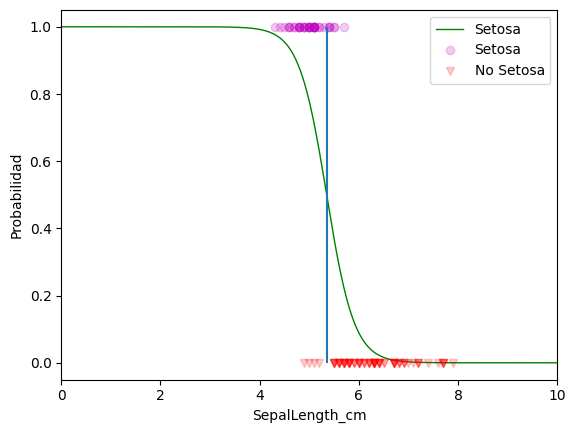

In [48]:
plt.figure()

# Regresión Logística
plt.plot(X_new, prob[:, 1], "g-", linewidth=1, label="Setosa")
# plt.plot(X_new, prob[:, 0], "b--", linewidth=1, label="No Setosa")

# Frontera de decisión
plt.plot(X_train[y_train==1], y_train[y_train==1],"mo",alpha=0.2,label="Setosa")
plt.plot(X_train[y_train==0], y_train[y_train==0],"rv",alpha=0.2,label="No Setosa")
plt.xlabel('SepalLength_cm')
plt.ylabel('Probabilidad')
plt.xlim(0.0,10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

**Observación:**

Vemos que para una matriz $X_{new}$ arbitraria que pueda representar la característica `SepalLength_cm`, la función de probabilidad que describe una vez pasa por la clase `LogisticRegression()` está dada por la expresión:

\begin{equation}
f(z) = \frac{1}{(1+e^{-z})}
\end{equation}

# Clasificación Multiclase

`LogisticRegression` usa estrategias como "one-vs-rest" (OvR) o "multinomial" para manejar múltiples clases.

# Tarea 8.1

¿Entrenar con más características y con base a las probabilidades, y dado un input  definir a qué clase pertenece: `'versicolor'`, `'virginica'` ?

Por ejemplo, dado X = [4.9, 5.0, 1.8, 0.3] asociados a todas las características, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virgínica?




In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

In [51]:
iris = datasets.load_iris()

X = iris['data']
Y = iris['target']

names_features = iris['feature_names']
names_target = iris['target_names']

df = pd.DataFrame(X, columns=names_features)

# Nombramos las características con la convención PascalCase
#
columns_name = ["".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name = [col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols
# Añadimos la característica objetivo
df['Target'] = Y
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


1. Creamos una muestra de entrenamiento y prueba

In [52]:
# índices para los datos
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# La estratificación se realiza en función de las etiquetas de la variable_objetivo
#
for train_index, test_index in split.split(df, df['Target']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

# Datos de entrenamiento y prubea
df_train = strat_train_set
df_test = strat_test_set

2. Realizamos la regresión logística para determinar la probabilidad para la clase Setosa

In [53]:
clases = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

def class_predict(classes, num_class, X):
  #
  X_train = df_train.iloc[:,0:4].values   # Tomamos todas las características
  y_train = (df_train['Target'] == num_class).astype(float)

  X_test = df_test.iloc[:,0:4].values
  y_test = (df_test['Target'] == num_class).astype(float)

  # Inicialización del modelo
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)   # Preparación del modelo con los datos

  print(f"Precisión del modelo en la clasificación para la clase {classes[num_class]}")
  print('\t Puntaje con los datos de entrenamiento:', log_reg.score(X_train, y_train))
  print('\t Puntaje con los datos de prueba:', log_reg.score(X_test, y_test))

  # Test con datos diferentes
  print('\nPara una flor con características X =', X)

  probX = log_reg.predict_proba(X)
  print(f'La probabilidad de que sea {classes[num_class]} es:', probX[0][1])

# -----------------------------------------------------------------------
X = np.array([4.9, 5.0, 1.8, 0.3])
X = X.reshape(1,-1)

class_predict(clases, 0, X)
print('\n-----------------------------------------------------------------------')
class_predict(clases, 1, X)
print('\n-----------------------------------------------------------------------')
class_predict(clases, 2, X)

Precisión del modelo en la clasificación para la clase Setosa
	 Puntaje con los datos de entrenamiento: 1.0
	 Puntaje con los datos de prueba: 1.0

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Setosa es: 0.9864365959832109

-----------------------------------------------------------------------
Precisión del modelo en la clasificación para la clase Versicolor
	 Puntaje con los datos de entrenamiento: 0.725
	 Puntaje con los datos de prueba: 0.7

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Versicolor es: 0.007752749403927729

-----------------------------------------------------------------------
Precisión del modelo en la clasificación para la clase Virginica
	 Puntaje con los datos de entrenamiento: 0.975
	 Puntaje con los datos de prueba: 0.9666666666666667

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Virginica es: 7.260106801151059e-06


# SOFTMAX REGRESION

Para clasificación multiclase ($K>2$):

- Las probabilidades para cada clase se calculan con la función ***softmax***:

$$
P(y = k \mid X) = \frac{e^{z_k}}{\sum_{i=1}^{K} e^{z_i}}
$$

Donde $ z_k $ es el puntaje lineal para la clase $ k $.

- El modelo devuelve un array con $K$ probabilidades, una para cada clase.


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el máximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rápida es mostrada a continuación.

In [54]:
# Para todas las clases se puede realizar fácilmente a través de lo siguiente

y_train = df_train['Target']
X_train = df_train.iloc[:,0:1].values   # Columna SepalLength_cm

y_test = df_test['Target']
X_test = df_test.iloc[:,0:1].values

In [55]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", \
                                 C=10, random_state=42)
# C>1: Trabajamos con un modelo flexible con bajos valores de penalización

softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [56]:
X_new = np.linspace(0, 10, 1).reshape(-1,1)

# Devuelve la probabilidad de la muestra para cada clase (0, 1, 2) en el modelo
# forma de prob: n_muestras, n_clases
softmax_reg.predict_proba(X_new)

array([[1.00000000e+00, 8.05800456e-14, 4.46297192e-19]])

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas

2. Analizar qué pasa con la regularización.

3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos.

4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), construir las fronteras de decisión para este multiclasificador.

### 1. Entrenamiento de un modelo multiclase

In [57]:
X_train = df_train.iloc[:,0:4].values   # Tomamos todas las características
y_train = df_train['Target']            # Tomamos todas las clases

X_test = df_test.iloc[:,0:4].values
y_test = df_test['Target']

# Trabajamos con un modelo multiclase con penalización flexible
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42, max_iter=120)

# Preparamos el modelo con los datos de entrenamiento
softmax_reg.fit(X_train, y_train)

print('Precisión del modelo en la clasificación multiclase de los datos:')
print('\t Puntaje con los datos de entrenamiento:', softmax_reg.score(X_train, y_train))
print('\t Puntaje con los datos de prueba:', softmax_reg.score(X_test, y_test))

X = np.array([4.9, 5.0, 1.8, 0.3])
X = X.reshape(1,-1)
print('\nPara una flor con características X =', X)

probMulX = softmax_reg.predict_proba(X)
print(f'* La probabilidad de que sea {clases[0]} es: {probMulX[0][0]}')
print(f'* La probabilidad de que sea {clases[1]} es: {probMulX[0][1]}')
print(f'* La probabilidad de que sea {clases[2]} es: {probMulX[0][2]}')
print('\n')

Precisión del modelo en la clasificación multiclase de los datos:
	 Puntaje con los datos de entrenamiento: 0.975
	 Puntaje con los datos de prueba: 1.0

Para una flor con características X = [[4.9 5.  1.8 0.3]]
* La probabilidad de que sea Setosa es: 0.9993103360826353
* La probabilidad de que sea Versicolor es: 0.0006896639173587157
* La probabilidad de que sea Virginica es: 6.030527304016402e-15




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### 2. Análisis de la regularización

La penalización regula la magnitud de los coeficientes del modelo. Cuando aumenta, el modelo se vuelve más "flexible", es decir, menos propenso a sobreajustarse a los datos de entrenamiento. Sin embargo, esto puede comprometer su capacidad para capturar patrones más complejos en los datos.

Esta se controla con el parámetro `C`, que es inverso a la fuerza de regularización $\lambda$.

* Por defecto, su valor es $C=1.0$, correspondiente a una **penalización moderada** que logra un buen equilibrio entre ajuste a los datos de entrenamiento y generalización a los datos de prueba.

* Un valor más pequeño de $C$ ($C=0.1$) implica mayor penalización (más fuerza regularizadora), por tanto, algunos coeficientes pueden ser cercanos a cero o incluso cero, lo que elimina características del modelo.

* Un valor más grande de $C$ ($C=10$) implica menor penalización (el modelo es más flexible), añadiendo mayor significancia y sensibilidad a las características, sin embargo, esto puede conllevar a un sobreajuste (especialmente si hay correlación significativa entre las características).


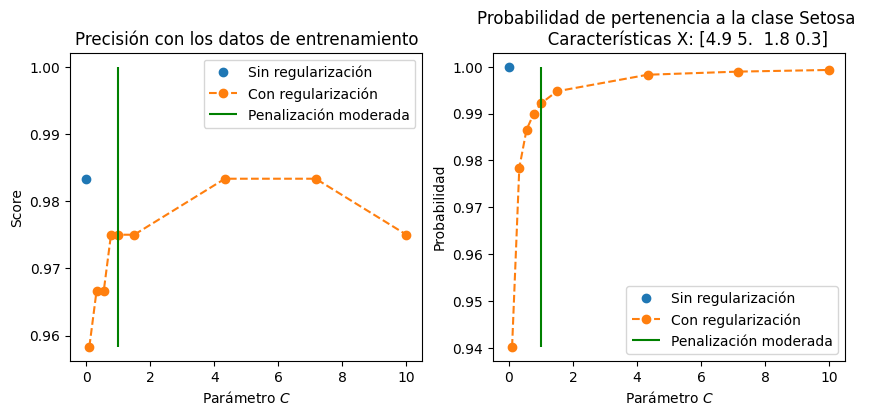

In [58]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X = np.array([4.9, 5.0, 1.8, 0.3])    # Características particulares
X = X.reshape(1,-1)

Cs = np.concatenate((np.linspace(0.1, 1, 5), np.linspace(1.5, 10, 4)))

scores_train = np.zeros(len(Cs)+1)
probs = np.zeros((len(Cs)+1, 3))    # Para cada C

# Regularización desactivada: penalty=none
#
softmax_reg = LogisticRegression(multi_class="multinomial", penalty=None, random_state=42, max_iter=120)
softmax_reg.fit(X_train, y_train)

scores_train[0] = softmax_reg.score(X_train, y_train)
probMulX = softmax_reg.predict_proba(X)   # Prob de que X pertenezca a cada una de las 3 clases
probs[0] = probMulX[0]

# Regularización activada: penalty='l2' por defecto
#
for i, c in enumerate(Cs):
  softmax_reg = LogisticRegression(multi_class="multinomial", C=c, random_state=42, max_iter=120)
  softmax_reg.fit(X_train, y_train)

  scores_train[i+1] = softmax_reg.score(X_train, y_train)
  probMulX = softmax_reg.predict_proba(X)
  probs[i+1] = probMulX[0]

# Gráficos para la clase Setosa
fig = plt.figure(figsize=(10,4))
# fig.suptitle(f"Score y Probabilidad del modelo de Softmax para la clase {clases[0]}")#, fontsize=15)

axs = fig.add_subplot(121)
axs.set_title('Precisión con los datos de entrenamiento')
axs.plot(0, scores_train[0], 'o', label='Sin regularización')
axs.plot(Cs, scores_train[1:], 'o--', label='Con regularización')
axs.vlines(1.0, min(scores_train), 1, color='g', label='Penalización moderada')
axs.set_xlabel('Parámetro $C$')
axs.set_ylabel('Score')
axs.legend()

axp = fig.add_subplot(122)
axp.set_title(f'Probabilidad de pertenencia a la clase {clases[0]} \n \
      Características X: {X[0]}')
axp.plot(0, probs[0,0], 'o', label='Sin regularización')
axp.plot(Cs, probs[1:,0], 'o--', label='Con regularización')
axp.vlines(1.0, min(probs[:,0]), 1, color='g', label='Penalización moderada')
axp.set_xlabel('Parámetro $C$')
axp.set_ylabel('Probabilidad')
axp.legend()

plt.show()

* Estos gráficos ilustran cómo afecta la regularización en el modelo de regresión logística multinomial (Softmax) al entrenar y predecir probabilidades para una muestra con características particulares.

* Cuando no hay regularización, el modelo es más flexible, logrando un score cerca de 1.0 que puede llevar al sobreajuste de los datos de entrenamiento.

* Con regularización, a medida que $C$ aumenta (menor fuerza de regularización), la precisión mejora inicialmente, pero se estabiliza y puede disminuir levemente si el modelo comienza a sobreajustar. El sobreajuste también se puede notar en el gráfico de probabilidad, donde con el aumento de $C$ la probabilidad de que dichas características pertenezcan a una clase Setosa crece acercándose exactamente a 1, comportándose similar al caso sin regularización.

* Con valores $C<1$ la precisión es menor porque el modelo está restringido (mayor regularización), y la probabilidad no se calcula con mejor precisión.

### 3. Análisis de métricas y curvas de aprendizaje

Entrenaremos el modelo con diferentes tamaños de datos de entrenamiento, calcularemos las métricas en cada caso y graficaremos las curvas de aprendizaje para analizar la evolución del desempeño.

* Si las curvas convergen cerca del 100%, el modelo tiene un buen desempeño.

* Si las curvas están separadas, el modelo puede estar sobreajustando.

* Si ambas curvas tienen valores bajos, el modelo está subajustando.

\
**Estrategia:**

* Utilizaremos la función `sklearn.model_selection.learning_curve()` para determinar las puntuaciones probando diferentes tamaños del conjunto de entrenamiento. Dividiremos los datos de entrenamiento en $k$ pliegues para realizar una validación cruzada.

\
**Validación cruzada:**

En lugar de usar una única partición de los datos para entrenamiento y prueba, la validación cruzada divide los datos en varias particiones o "pliegues" ($k$ folds) y utiliza diferentes combinaciones de ellos para entrenar y evaluar el modelo.

1. K-Fold Cross-Validation:

  * Divide el conjunto de datos en $K$ partes o pliegues (folds).

  * En cada iteración, usa $K-1$ pliegues para entrenamiento y el pliegue restante para prueba. Los nuevos datos de entrenamiento se van dividiendo en $n$ muestras de diferentes tamaños (proporciones desde el 10% al 100%) para entrenar el modelos y evaluar el score.

  * Se repite $k$ veces, y el resultado final es el promedio de las métricas de las iteraciones.

    * Ejemplo: Para $K=5$, los datos se dividen en 5 subconjuntos:
    
      Iteración 1: Pliegues 1-4 para entrenamiento, pliegue 5 para prueba.
    
      Iteración 2: Pliegues 1-3 y 5 para entrenamiento, pliegue 4 para prueba.

2. Stratified K-Fold Cross-Validation:

  Similar a K-Fold, pero divide los datos manteniendo la proporción de clases en cada pliegue.

3. Time Series Cross-Validation:

  Los datos de entrenamiento siempre están antes de los datos de prueba para respetar la naturaleza temporal.


**Función `learning_curve()`**

Determina puntajes de entrenamiento y pruebas validados de forma cruzada para diferentes tamaños de conjuntos de entrenamiento.

Esta función genera curvas de aprendizaje para evaluar cómo el desempeño del modelo varía con el tamaño del conjunto de entrenamiento.

**Parámetros importantes:**

* `estimator`: Modelo que se quiere evaluar.

* `X` y `y`: Características y etiqueta objetivo, respectivamente.

* `groups`: (opcional) Grupos de datos para validación cruzada estratificada por grupos.

* `train_sizes` (por defecto: `np.linspace(0.1, 1.0, 5)`): Corresponde a las proporciones de los datos de entrenamiento que se utilizarán para generar las curvas.

* `cv`: Determina la estrategia de división de validación cruzada. Las posibles entradas son:

  * `None`: Usa por defecto 5 pliegues.

  * `int`: Especifica el número de pliegues y utiliza por defecto la estratificación `StratifiedKFold` (para datos poco abundantes).

  * `splits`: Matrices de índices (p.ej. `StratifiedShuffleSplit`, para grandes datasets, donde no importa el solapamiento de datos de pliegues).

* `scoring` (None por defecto): Métrica utilizada para evaluar el desempeño del modelo.

  Ejemplo: "accuracy", "precision", "recall", "f1", etc.

* `n_jobs`: Número de tareas paralelas para ejecutar (múltiples CPUs).

* `random_state`: Controla la aletoriedad de las muestras estratificadas (shuffle).

**Salidas:**

* `train_sizes_abs`: Tamaños absolutos del conjunto de entrenamiento utilizados en cada paso.

* `train_scores` $(n,k)$: Array de puntuaciones en los conjuntos de entrenamiento para cada tamaño y división de validación cruzada.

* `test_scores`: Array de puntuaciones en los conjuntos de prueba para cada tamaño y división de validación cruzada.



A continuación, se promedian las puntuaciones de las $k$ ejecuciones para cada tamaño de subconjunto de entrenamiento.

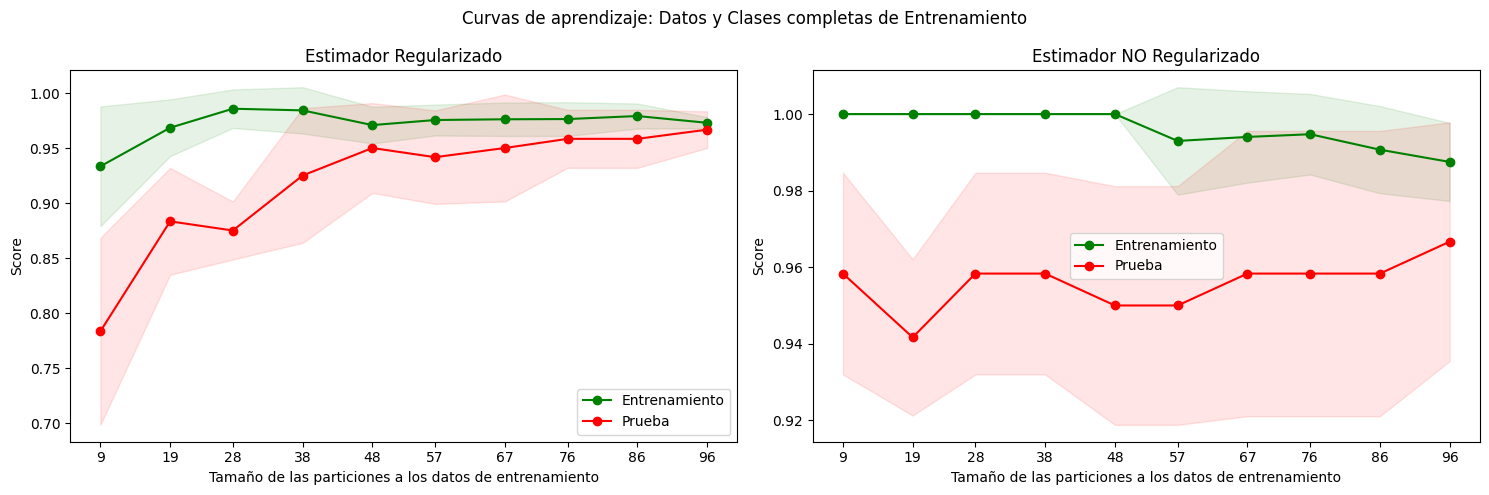

In [59]:
from sklearn.model_selection import learning_curve

# Estratificación cruzada -> Generamos 5 conjuntos de índices estratificados
splits = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# -------------------------------------------------------------------------------------------------
# Estimador de regresión logística: REGULARIZADO
model = LogisticRegression(multi_class="multinomial", random_state=42)

# Curvas de aprendizaje
# cv=5 -> Validación cruzada generando 5 pliegues StratifiedKFold para cada subconjunto de entrenamiento
# cv=splits -> Validación cruzada usando pliegues estratificados personalizadamente
# train_sizes -> n=10 particiones a los datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=splits, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=4
)

# Medias y desviaciones de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)   # n=10: Promedio de los pliegues
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico de las curvas de aprendizaje
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Curvas de aprendizaje: Datos y Clases completas de Entrenamiento")
axes[0].set_title('Estimador Regularizado')
axes[0].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento', c='g')
axes[0].fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color="g")
axes[0].plot(train_sizes, test_scores_mean, 'o-', label='Prueba', c='r')
axes[0].fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color="r")
axes[0].set_xticks(train_sizes)
axes[0].set_xlabel('Tamaño de las particiones a los datos de entrenamiento')
axes[0].set_ylabel('Score')
axes[0].legend()

# -------------------------------------------------------------------------------------------------
# Estimador de regresión logística: NO REGULARIZADO
model = LogisticRegression(multi_class="multinomial", penalty=None, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=splits, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=4
)

# Medias y desviaciones de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)   # n=10: Promedio de los pliegues
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[1].set_title('Estimador NO Regularizado')
axes[1].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento', c='g')
axes[1].fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color="g")
axes[1].plot(train_sizes, test_scores_mean, 'o-', label='Prueba', c='r')
axes[1].fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color="r")
axes[1].set_xticks(train_sizes)
axes[1].set_xlabel('Tamaño de las particiones a los datos de entrenamiento')
axes[1].set_ylabel('Score')
axes[1].legend()

fig.tight_layout()

El gráfico muestra que el estimador regularizado logra un mejor equilibrio entre el desempeño en entrenamiento y en prueba (con brecha pequeña entre ambas curvas y menor variabilidad), lo cual indica menos sobreajuste y una mayor estabilidad a medida que crece el tamaño de los datos. Por el contrario, el estimador no regularizado presenta una brecha más amplia entre el puntaje de entrenamiento (cercano a 1) y el de prueba, así como mayores fluctuaciones, evidenciando una tendencia a sobreajustar y a ser más sensible a los cambios en los datos de entrenamiento.

### 4. Fronteras de decisión para la multiclasificación

In [60]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

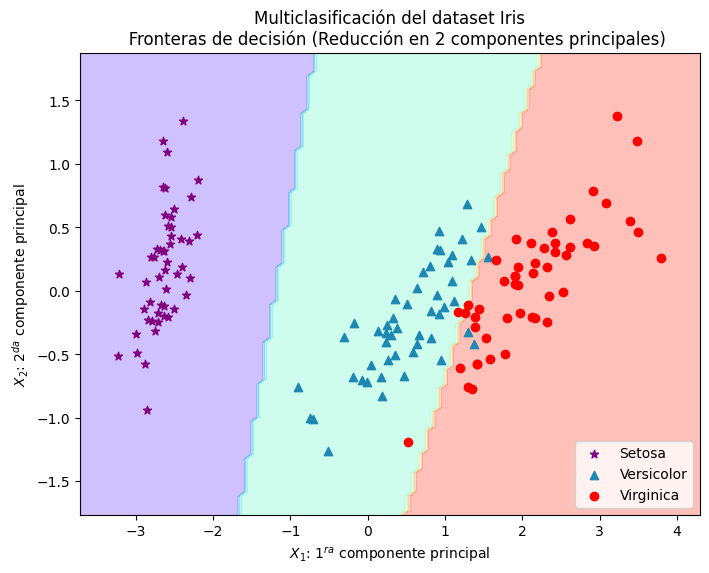

In [61]:
# Tomamos la base de datos completa
X = iris["data"]
y = iris["target"]

# Preparamos el modelo de regresión logística regularizado moderadamente (C=1.0) y de multiclasificación
softmax_reg_full = LogisticRegression(multi_class="multinomial", random_state=42, max_iter=120)

# Reducción en componentes principales
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)    # X1, X2: Nuevas componentes
X1 = X_reduced[:, 0]
X2 = X_reduced[:, 1]
softmax_reg_full.fit(X_reduced, y)  # Preparamos el modelo con las componentes principales

# Gráfico de las fronteras de decisión
X1_, X2_ = np.meshgrid(np.linspace(X1.min()-0.5, X1.max()+0.5, 100), \
                       np.linspace(X2.min()-0.5, X2.max()+0.5, 100) )

# Aplanamos los arreglos de la malla para aplicar el modelo a cada punto
X_new = np.c_[X1_.ravel(), X2_.ravel()]
Y_predict = softmax_reg_full.predict(X_new)
Y_predict = Y_predict.reshape(X1_.shape)

fig = plt.figure(figsize=(8,6))
plt.title('Multiclasificación del dataset Iris\n \
  Fronteras de decisión (Reducción en 2 componentes principales)')
plt.contourf(X1_, X2_, Y_predict, cmap=plt.cm.rainbow, alpha=0.3)
# plt.scatter(X1, X2, c=y, cmap=ListedColormap(['blue','#1e88b2','red']))
plt.scatter(X1[y==0], X2[y==0], c='purple', marker='*', label=clases[0])
plt.scatter(X1[y==1], X2[y==1], c='#1e88b2', marker='^', label=clases[1])
plt.scatter(X1[y==2], X2[y==2], c='r', label=clases[2])
plt.legend(loc='lower right')
plt.xlabel(r'$X_1$: $1^{ra}$ componente principal')
plt.ylabel(r'$X_2$: $2^{da}$ componente principal')
plt.show()

In [62]:
z = Y_predict.ravel()
pf = pd.Series(z)
pf.unique(), pf.value_counts(), Y_predict.shape

(array([0, 1, 2]),
 2    3666
 0    3201
 1    3133
 Name: count, dtype: int64,
 (100, 100))

In [63]:
z = Y_predict.ravel()
pf = pd.Series(z)
pf.unique(), pf.value_counts()

(array([0, 1, 2]),
 2    3666
 0    3201
 1    3133
 Name: count, dtype: int64)


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html